## Student Performance (Multiple Linear Regression)

This notebook demonstrates a basic workflow for predicting a 'Performance Index' from student features using linear regression techniques.
The dataset is taken from Kaggle: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression.

Notebook structure:
- Setup: imports and global objects
- Load data: read CSV and align rows
- Clean data: encoding and simple preprocessing
- Explore: quick scatter plots of each feature vs target
- Scale & split: scale features (optional: scale target) and create train/test sets
- Model training & evaluation (to be added)

Notes: This is an educational notebook — steps are explicit to make the workflow clear.

In [298]:
# Imports and global objects
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Use separate scalers for features and target
x_scaler = StandardScaler()
y_scaler = StandardScaler()

## Load Data and Clean Data

### Load data

Read the CSV into a single `DataFrame` and drop rows with missing values across any column. Dropping at the `DataFrame` level ensures that feature matrix `X` and target `y` remain aligned (same row indices).

We then separate `X` (features) and `y` (target) and keep `col_names` for plotting/inspection.

In [299]:
# Load dataset and align rows before any drops/transformations
df = pd.read_csv('Student_Performance.csv')
# Drop any rows that contain nulls in the whole dataframe to keep X and y aligned
df = df.dropna().reset_index(drop=True)
X = df.drop('Performance Index', axis=1)
col_names = X.columns
y = df['Performance Index']

X.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5


### Clean Data

This step performs simple cleaning and encoding of categorical columns. For this dataset we convert the 'Yes'/'No' values in 'Extracurricular Activities' to binary 1/0.

If your dataset has other categorical columns consider using `pd.get_dummies` or an appropriate encoder depending on whether the categories are ordinal or nominal.

Important: because we already dropped rows with missing values earlier, `X` and `y` are aligned here and we can safely operate on `X` without reindexing `y`.

In [300]:
# Clean and encode columns 
X['Extracurricular Activities'] = X['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


## Visualize Data and Scaling of Features

### Quick visual inspection

Before scaling or modelling, it's useful to plot each feature against the target to look for relationships, outliers, and scale differences. The `show_features` function below creates scatter plots for each feature vs the Performance Index.

In [301]:
# Convert to numpy arrays for plotting and modelling (still aligned)
X = X.to_numpy()
y = y.to_numpy()
def show_features(X, y, col_names):
    # Create one subplot per feature in a single row for clarity
    n = len(col_names)
    fig, axs = plt.subplots(1, n, figsize=(4*n, 4))
    if n == 1:
        axs = [axs]
    for i, ax in enumerate(axs):
        ax.scatter(X[:, i], y)
        ax.set_title(f'{col_names[i]} vs Performance Index')
        ax.set_xlabel(col_names[i])
        ax.set_ylabel('Performance Index')
        ax.grid(True)
    plt.tight_layout()
    plt.show()

### Scaling

We scale input features (`X`) using `StandardScaler`. This is due to how previous scores value is much larger than the other columns. We want each column to contribute equally. Scaling the target (`y`) is optional for linear regression

### Features Before Scaling
Note how previous scores is much larger than every other feature

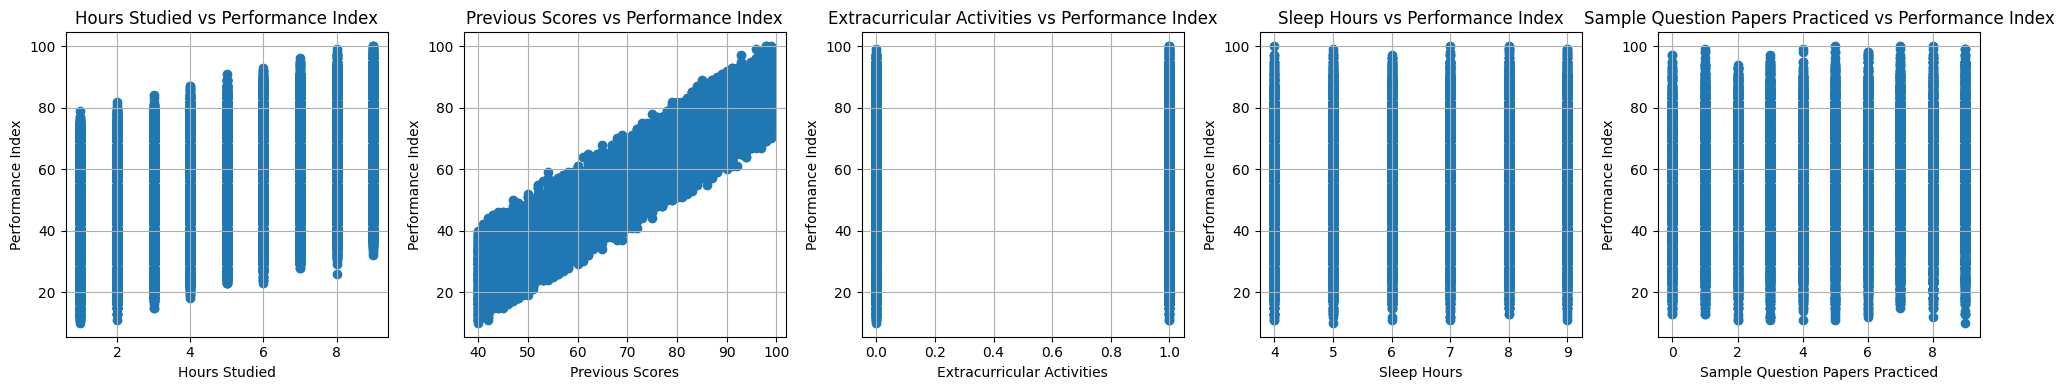

In [302]:
show_features(X, y, col_names)

### After Scaling
Note how all features have very similar domains.

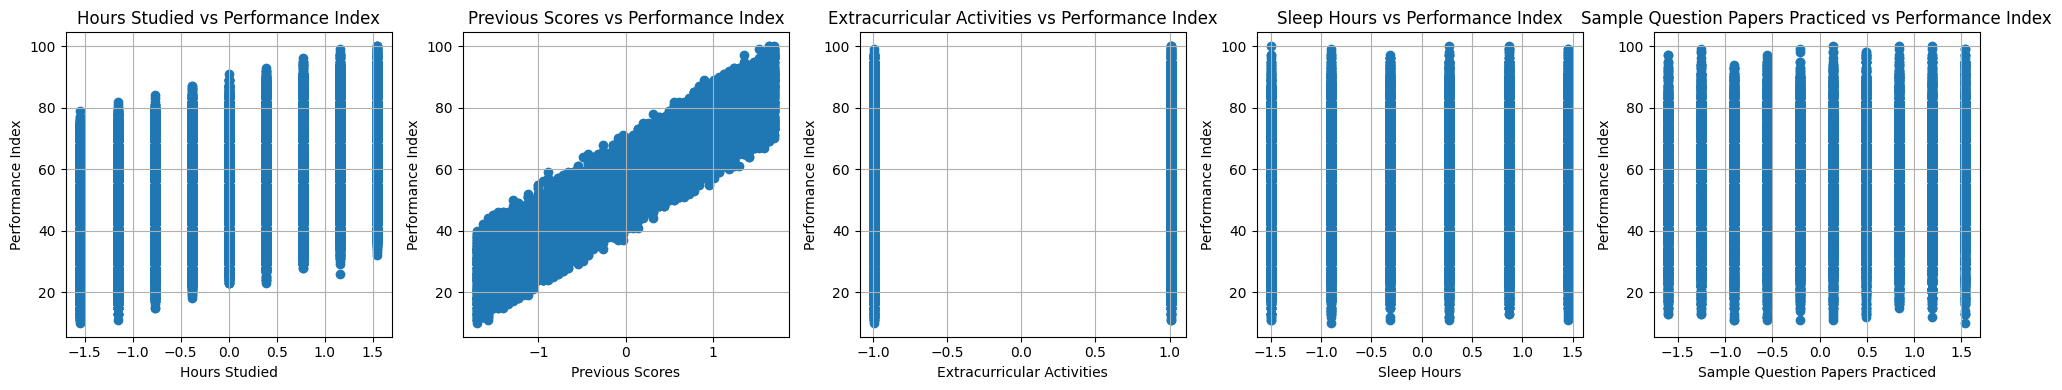

In [303]:
X = x_scaler.fit_transform(X)
show_features(X, y, col_names)
# First off by visualizing the features, we can see that our relationships are roughly linear so we do not have to do any transformations as of now.

## Training / Test Split and Model Training

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 67)
model = SGDRegressor(alpha = 0.0001, max_iter = 10000, epsilon = 0.05)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rsme = mean_squared_error(y_test, y_pred)
print(rsme)

4.137688373498137


# Visualisations

### Predicted vs Actuals
Since are predicted and actuals are following the same linear relationship we can infer the model is a good fit.

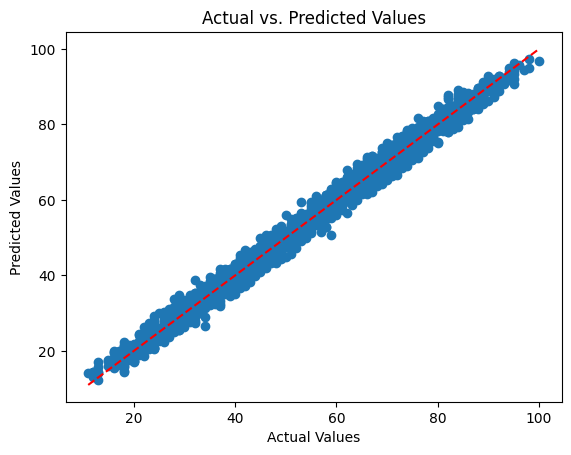

In [305]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

### Predicted vs Residuals
A good residual plot should have the residuals centered around 0, with no discernable pattern.

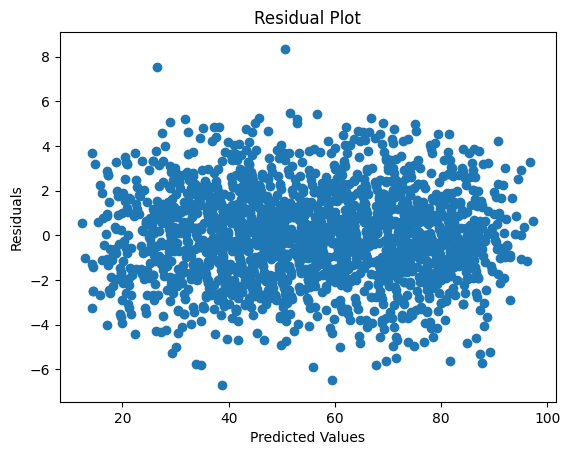

In [306]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Residual distribution
Lastly a good residual distribution should be relatively normal

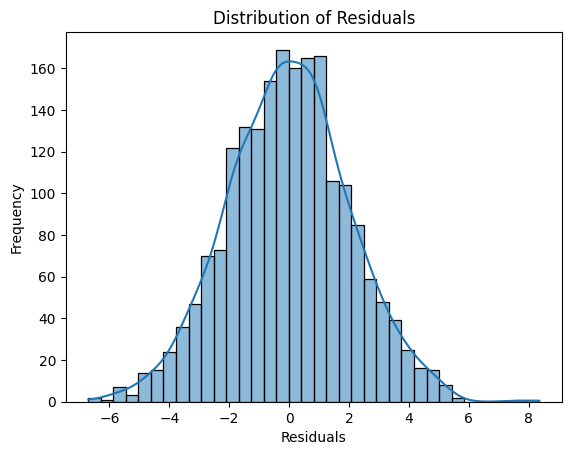

In [307]:
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()